<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)  
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

<br><br>
## <strong>1 금융 시계열 데이터 결측치 처리 / 보간법
pandas를 활용한 데이터 정렬 및 보간법
1. DataFrame.fillna()
2. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

<br><br>
## **2 금융 시계열 데이터 전처리**
데이터 분석을 위한 전처리 방법

<br>
### **01 가격 차이가 큰 시계열 데이터 비교하기**
데이터 정규화 / 비정규화

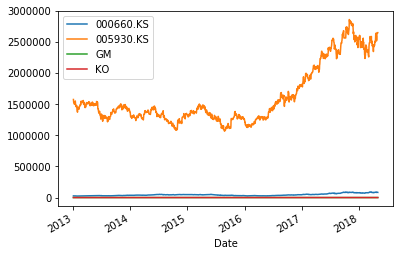

In [5]:
%matplotlib inline
prices.plot()

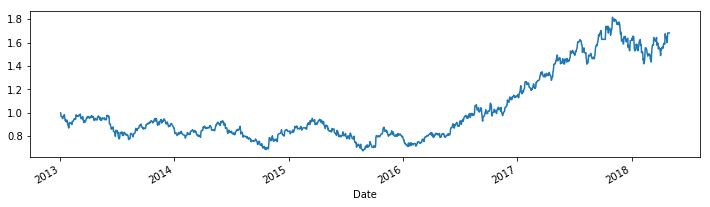

In [10]:
# .pct_change() : 퍼센트 변화율을 계산
# .cumprod()    : 일별 퍼센트 변화의 "누적 곱" 계산
returns      = price.pct_change()
ret_price    = (1 + returns).cumprod() # 1 + : 초기 1에서 부터 확률곱을 누적
ret_price[0] = 1

%matplotlib inline
ret_price.plot(figsize=(12,3))

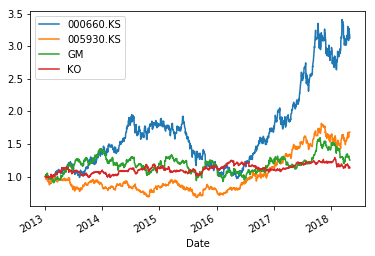

In [11]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod() # 1 + : 초기 1에서 부터 확률곱을 누적
    pct_returns[0] = 1
    pct_returns.plot(legend=True)

<br>
### **02 누적 수익률 계산 **
.pct_change().cumprod()

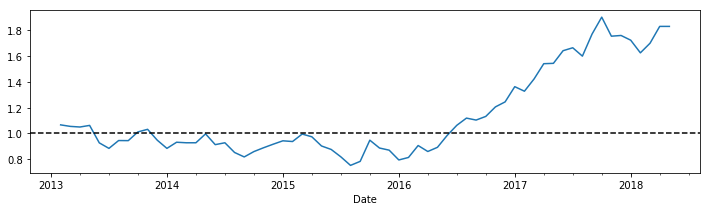

In [14]:
import matplotlib.pyplot as plt
m_ret.plot(figsize=(12,3))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **03 중간 배당데이터 추가하기**
재귀적 연산

<br><br>
## **3 금융데이터  분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 Introduction**

<br>
### **02 주가간의 상관계수 분석**
.corr

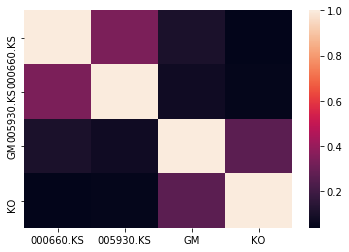

In [22]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)

<br>
### **03 Value At Risk**
**일일 손실확률**과 **표준편차**를 사용하여, 해당 종목의 오차범위내 최대 손실가능 금액을 계산한다 [code link](https://www.quantstart.com/articles/Value-at-Risk-VaR-for-Algorithmic-Trading-Risk-Management-Part-I)

    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P.

<br><br>
## **4 이동평균선을 활용한 매매 분석**
Golden Cross / Death Cross

<br>
### **01 이동평균 데이터 생성하기**
이동평균 및 차분(.diff()) 데이터 생성하기

,Close,15d,40d,15d-40d
Date,,,,
2018-04-30,84500.0,84033.33,84290.0,-256.67
2018-05-01,84500.0,84306.67,84342.5,-35.83
2018-05-02,83100.0,84433.33,84352.5,80.83


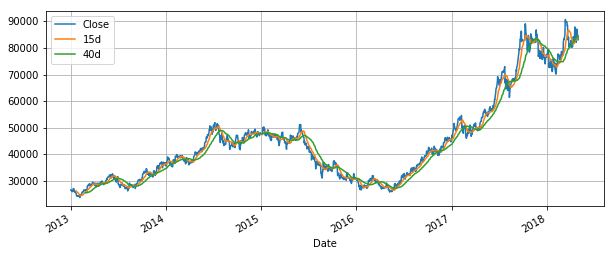

In [26]:
# 15일 이동평균선과 14일 이동평균선
# 그리고 이동평균선간의 '차분'데이터 생성
import numpy as np
price_df['15d'] = np.round(price_df['Close'].rolling(window=15).mean(),2)
price_df['40d'] = np.round(price_df['Close'].rolling(window=40).mean(),2)
price_df['15d-40d'] = price_df['15d'] - price_df['40d']
price_df[['Close','15d','40d']].plot(grid = True, figsize = (10, 4))
price_df.tail(3)

<br>
### **02 매매 시점 데이터 생성하기**
이동평균 및 차분(.diff()) 데이터 생성하기
1. np.where(조건문, True일때 입력데이터, False 일때 입력할 데이터)

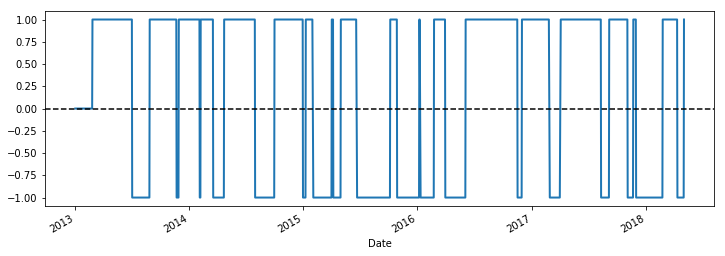

In [28]:
price_df['Stance'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

<br>
### **03 SMAC_Strategy (이동평균선 전략)으로 인한 수익률  데이터 생성**
1. 데이터 변화를 Pct_change 가 아닌 Log 로 변환
1. .cumsum() : Log 결과값을 더하면 누적 수익률로 예측이 가능
1. np.exp() : $ y = e^x$ 자연상수 지수함수로 변환 &nbsp;&nbsp; | &nbsp; [출처](http://rfriend.tistory.com/295)

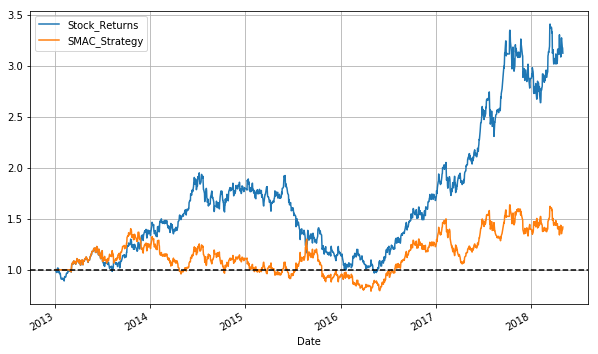

In [29]:
# 매매 수익률 계산
price_df['Stock_Returns'] = np.log(price_df['Close'] / price_df['Close'].shift(1))    # 일간 log() 변환데이터 생성
price_df['SMAC_Strategy'] = price_df['Stock_Returns'] * price_df['Stance'].shift(1)   # 매매 데이터를 1일 지연시키고, 시장 수익률을 곱한다
price_df[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

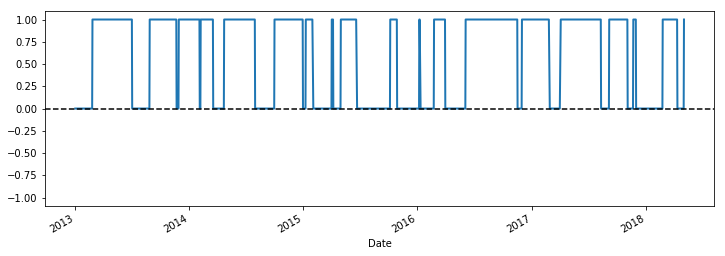

In [30]:
# 공매도가 불가능한 경우
price_df['Stance2'] = np.where(price_df['15d-40d']>X,  1, 0)                # True :  1 \ False : 0
price_df['Stance2'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

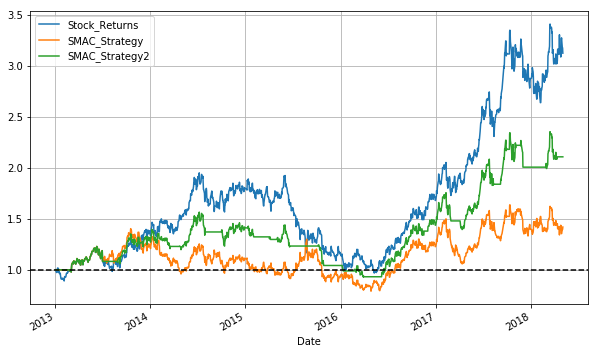

In [31]:
# 일간 log() 변환데이터 생성
# 매매 데이터를 1일 지연시키고, 시장 수익률을 곱한다
price_df['Stock_Returns']  = np.log(price_df['Close']  / price_df['Close'].shift(1))    
price_df['SMAC_Strategy2'] = price_df['Stock_Returns'] * price_df['Stance2'].shift(1)   
price_df[['Stock_Returns','SMAC_Strategy','SMAC_Strategy2']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
## ** 5 몬테카를로 시뮬레이션**
1. 랜덤한 숫자묶음을 대입하여, **결정론적 모델**을 반복적으로 평가한다
1. 결과들을 분석하여 **가장 가능성이 높은 하나**를 출력한다
1. 모델이 복잡하고, **선형적이지 않으며**, 불확실한 파라미터 쌍을 1개 이상 포함하는 모델의 평가시 사용

<br>
### **01 난수를 활용한 최적의 결과값 측정**
30명 중에 생일이 같은 사람들이 존재할 확률의 계산

<br>
### **02 금융상품들의 포트폴리오 평가**
예상 수익률과 변동성 계산

<br>
### **03 몬테카를로 시뮬레이션을 활용한  포트폴리오 평가**
난수를 활용하여 다양한 포트폴리오를 사프지수 Sharpe Ratio (return / volatility) 로 평가 

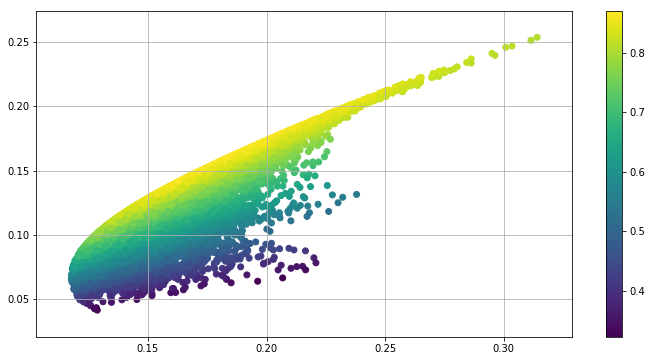

<br>
### **04 몬테카를로 포트폴리오 최적값 계산**
1. 샤프지수가 최대인 포트폴리오
1. 표준편차가 최소인 포트폴리오 

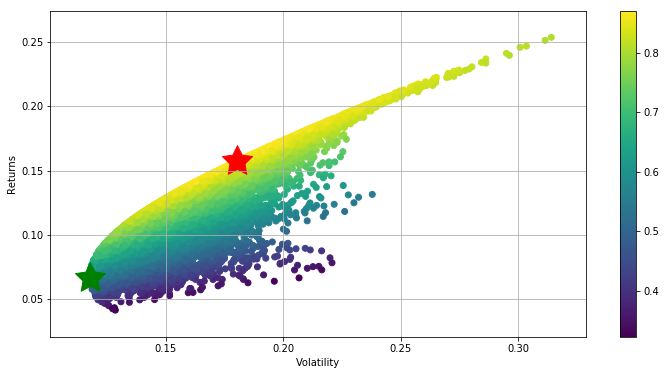

In [36]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()] # 사프지수 최대값인 인자값을 추출
min_vol_port    = results_frame.iloc[results_frame['stdev'].idxmin()]  # 표준편차가 최소인 인자값을 추출

In [37]:
# 사프지수 최대로 갖는 포트폴리오 비율 	
print(max_sharpe_port)

ret          0.157251
stdev        0.180507
sharpe       0.871163
GM           0.438808
KO           0.200777
005930.KS    0.150194
000660.KS    0.210221
Name: 13057, dtype: float64


In [38]:
# 변동성을 최소로 갖는 포트폴리오 비율
print(min_vol_port)

ret          0.066556
stdev        0.117754
sharpe       0.565213
GM           0.058156
KO           0.176958
005930.KS    0.116371
000660.KS    0.648516
Name: 4297, dtype: float64


<br>
## ** 6 다양한 금융 데이터 생성하기**
https://wikidocs.net/3396
Bollinger Bands 

<br>
### **01 Stochastic Oscillator** 
[Python Code](https://wikidocs.net/3396) | [개념 바로가기](https://steemkr.com/kr/@phuzion7/stochastic-and-bitcoin)

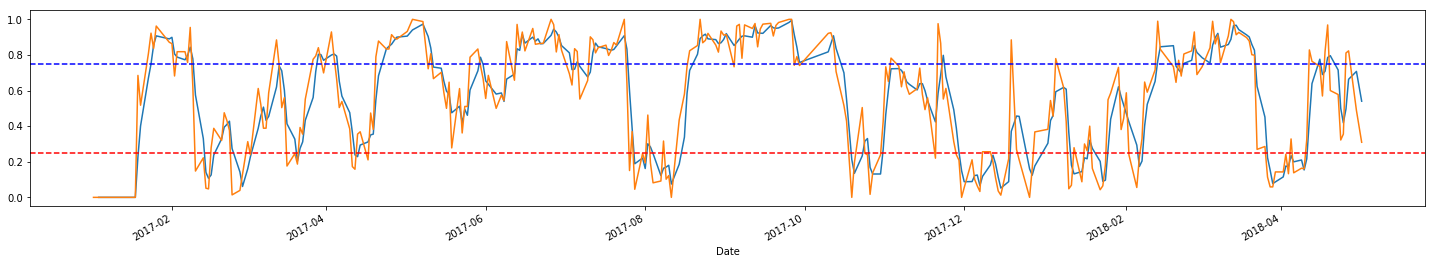

<br>
### **02 RSI(Relative Strength Index; 상대강도지수)** 
[Python Code](https://wikidocs.net/3399) | [개념 바로가기](https://steemkr.com/kr/@phuzion7/stochastic-and-bitcoin)

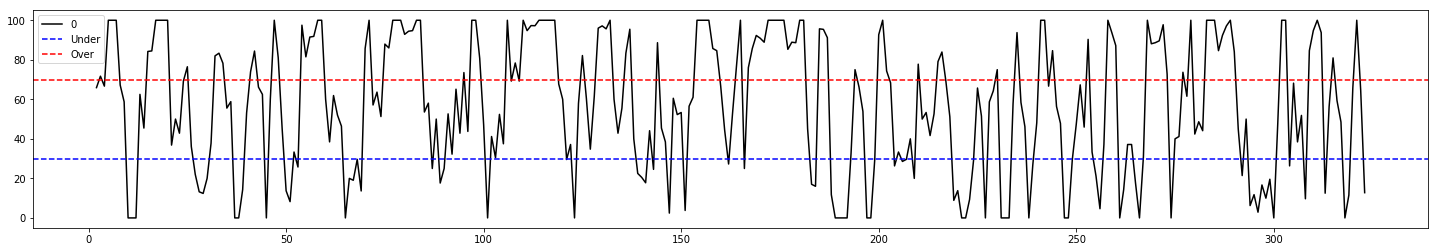

<br>
### **03 볼린저 밴드 데이터 그리기**
Bollinger Bands 

/home/erdos/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/erdos/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/erdos/Jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

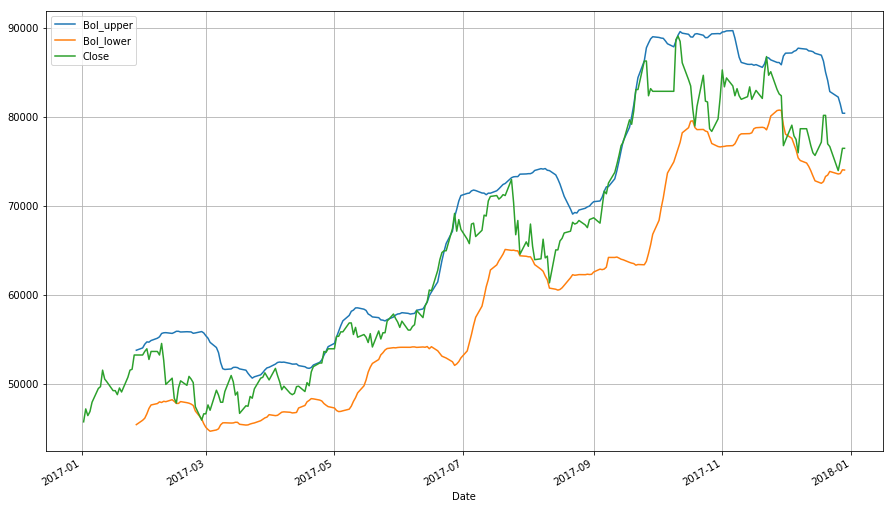

<br>
### **04 MACD(moving average convergence/divergence)** 
[Python Code](https://wikidocs.net/3397) | 지수 이평선의 차분 데이터의 시각화로 일반적으로 MACD(12, 26, 9)가 많이 사용됩니다. 

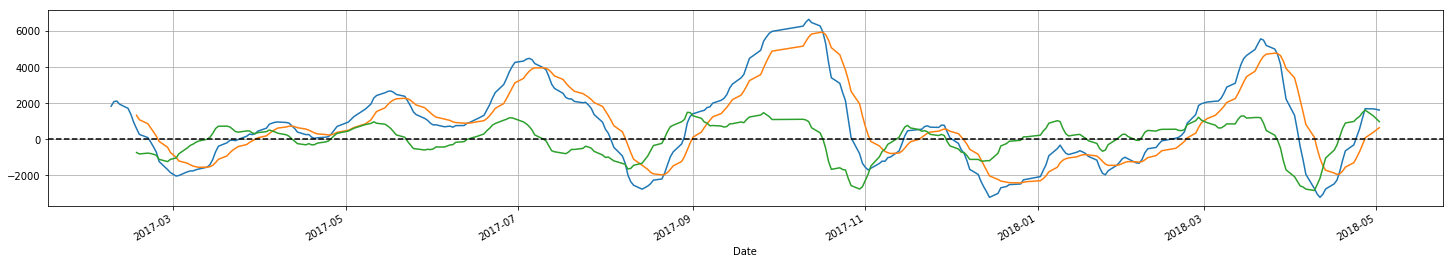

In [49]:
plt.figure(figsize=(25,4))
price_fnMACD.MACD.plot()
price_fnMACD.MACDSignal.plot()
price_fnMACD.MACDDiff.plot()
plt.axhline(y = 0, linestyle = '--', color = 'k')  # 과매도 구간
plt.grid();plt.show()